# Unsupervised learning: basics
- What is unsupervised learning?
    - A group of machine learning algorithm that find patterns in data
    - Data for algorithms has not been labeled, classified or characterized
    - The objective of the algorithm is to interpret any structure in the data
    - Common unsupervised learning algorithms : Clustering, neural network, anomaly detection
- What is clustering?
    - The process of grouping items with similar characteristics
    - Items in groups similar to each other than in other groups
    - Example: distance between points on a 2D plane

## Basics of cluster analysis
- What is a cluster?
    - A group of items with similar characteristics
    - Google News: articles where similar words and word associations appear together
    - Customer Segments
- Clustering Algorithms
    - Hierarchical Clustering
    - K-means Clustering
    - Other clustering algorithms: DBSCAN, Gaussian Methods

# Comparison of Clustering Algorithms
|Clustering Model| Pros| Cons |
|-------:|-------:|------:|
|K-Means|Simple to understand, easily adaptable, works well on small or large datasets, fast, efficient and performant|Need to choose the number of clusters| 
|Hierarchical Clustering|The optimal number of clusters can be obtained by the model itself, practical visualization with the dendrogram|Not appropriate for large datasets| 

\begin{exercise}
Compare the two algorithms on the following dataset 
```
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)
```
Describe what do you observe.
\end{exercise}


\begin{exercise}
Use the metrics described in https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation section "2.3.10. Clustering performance evaluation" to evaluate the two algorithms.
\end{exercise}





C:\Users\stavr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


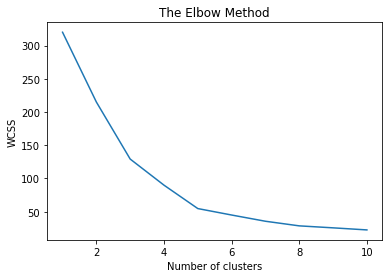

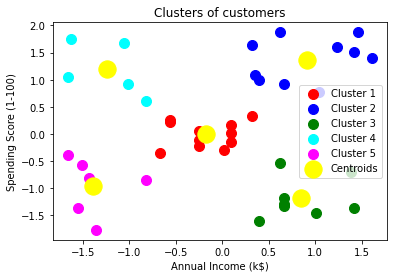

In [12]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_test)

# Visualising the clusters
plt.scatter(X_test[y_kmeans == 0, 0], X_test[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_kmeans == 1, 0], X_test[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test[y_kmeans == 2, 0], X_test[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test[y_kmeans == 3, 0], X_test[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test[y_kmeans == 4, 0], X_test[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [13]:
from sklearn.metrics import rand_score as rs

rs(y_test, y_kmeans)

0.8051282051282052

In [14]:
from sklearn import metrics

metrics.silhouette_score(X_test, kmeans.labels_)

0.5347938977245692

In [15]:
metrics.davies_bouldin_score(X_test, kmeans.labels_)

0.5397522391770739

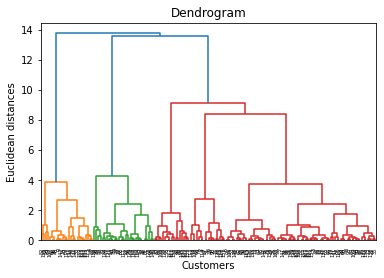

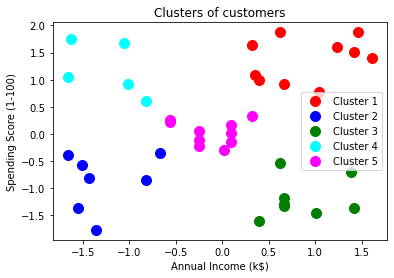

In [18]:
# Hierarchical Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 3].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_train, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
hc.fit(X_train)
y_hc = hc.fit_predict(X_test)

# Visualising the clusters
plt.scatter(X_test[y_hc == 0, 0], X_test[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_test[y_hc == 1, 0], X_test[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_test[y_hc == 2, 0], X_test[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_test[y_hc == 3, 0], X_test[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X_test[y_hc == 4, 0], X_test[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
rs(y_test, y_hc)

0.8102564102564103

In [20]:
metrics.silhouette_score(X_test, hc.labels_)

0.5158977960931366

In [21]:
metrics.davies_bouldin_score(X_test, hc.labels_)

0.5520292737769307

In this specific dataset we can see that kmeans performs almost the same as hierarchical clustering, because the dataset is small.

In [22]:
from sklearn.datasets import make_moons
X,y = make_moons(200, noise=0.05, random_state=0)


C:\Users\stavr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


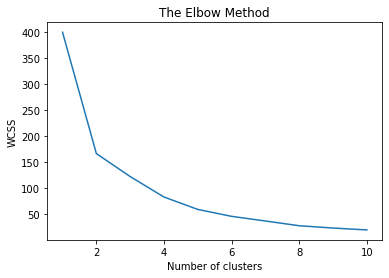

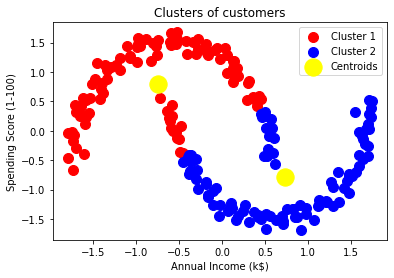

In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [36]:
rs(y, y_kmeans)

0.7508040201005025

In [37]:
metrics.silhouette_score(X, kmeans.labels_)

0.49304627727701233

In [38]:
metrics.davies_bouldin_score(X, kmeans.labels_)

0.8062106981225069

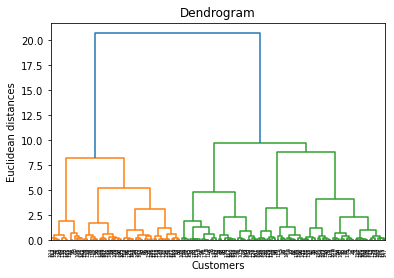

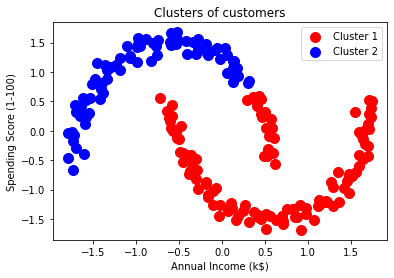

In [39]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
hc.fit(X)
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [40]:
rs(y, y_hc)

0.8032160804020101

In [41]:
metrics.silhouette_score(X, hc.labels_)

0.4572323945292666

In [42]:
metrics.davies_bouldin_score(X, hc.labels_)

0.8407238391521796

The algorithms perform almost the same. Hierarchical is a bit better. We can observe that the data don't have separation, so davies bouldin score is high.